# [自習] 5.2 Keras の Functional API を使って CIFAR10 を解く

## [自分へのメモ] 学習データをそのまま使うバージョンと、Data Augmentaion で増やして使うバージョンを試す

In [ ]:
# データをロードする
from tensorflow.keras import datasets

(x_train, t_train), (x_test, t_test) = datasets.cifar10.load_data()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
# モデル(ニューラルネットワーク)を作成する
import tensorflow as tf
from tensorflow.keras import layers, regularizers

def CNN(input_dim, output_dim):
    weight_decay = 1e-4
    input = tf.keras.Input(shape=input_dim, dtype='float32')
    H = layers.Conv2D(
            filters=32,
            kernel_size=(3,3),
            padding='same',
            kernel_regularizer=regularizers.l2(weight_decay),
            activation='relu'
            )(input)
    H = layers.MaxPooling2D(pool_size=(2,2))(H)
    H = layers.Conv2D(
            filters=128,
            kernel_size=(3,3),
            padding='same',
            kernel_regularizer=regularizers.l2(weight_decay),
            activation='relu'
            )(H)
    H = layers.MaxPooling2D(pool_size=(2,2))(H)
    H = layers.Conv2D(
            filters=256,
            kernel_size=(3,3),
            padding='same',
            kernel_regularizer=regularizers.l2(weight_decay),
            activation='relu'
            )(H)
    H = layers.MaxPooling2D(pool_size=(2,2))(H)
    H = layers.Flatten()(H)
    H = layers.Dropout(0.4)(H)
    H = layers.Dense(512, activation='relu')(H)
    H = layers.Dense(10, activation='softmax')(H)
    return tf.keras.Model(inputs=input, outputs=H)

## 学習データを[0,1]に正規化してからそのまま使う

In [ ]:
# データの正規化 [0,255] --> [0.0, 1.0]
x_tr = x_train / 255
x_te = x_test / 255

In [ ]:
# モデルを作成する
model1 = CNN(x_tr.shape[1:], 10)

model1.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'])

In [ ]:
# 学習する
history1 = model1.fit(
    x_tr, 
    t_train, 
    batch_size=64, 
    epochs=100,
    validation_split=0.2)

Epoch 1/100
625/625 [==============================] - 4s 6ms/step - loss: 1.6093 - accuracy: 0.4246 - val_loss: 1.2129 - val_accuracy: 0.5733
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 1.1347 - accuracy: 0.6099 - val_loss: 0.9899 - val_accuracy: 0.6663
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 0.9585 - accuracy: 0.6774 - val_loss: 0.8651 - val_accuracy: 0.7118
Epoch 4/100
625/625 [==============================] - 3s 6ms/step - loss: 0.8543 - accuracy: 0.7196 - val_loss: 0.8779 - val_accuracy: 0.7207
Epoch 5/100
625/625 [==============================] - 3s 6ms/step - loss: 0.7730 - accuracy: 0.7470 - val_loss: 0.7575 - val_accuracy: 0.7582
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 0.7136 - accuracy: 0.7728 - val_loss: 0.7979 - val_accuracy: 0.7530
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 0.6661 - accuracy: 0.7908 - val_loss: 0.8063 - val_accuracy: 0.7527

Epoch 58/100
625/625 [==============================] - 3s 6ms/step - loss: 0.4927 - accuracy: 0.8936 - val_loss: 0.9265 - val_accuracy: 0.7654
Epoch 59/100
625/625 [==============================] - 3s 5ms/step - loss: 0.4845 - accuracy: 0.8949 - val_loss: 1.4920 - val_accuracy: 0.7550
Epoch 60/100
625/625 [==============================] - 3s 5ms/step - loss: 0.4884 - accuracy: 0.8923 - val_loss: 1.2090 - val_accuracy: 0.7745
Epoch 61/100
625/625 [==============================] - 3s 5ms/step - loss: 0.4834 - accuracy: 0.8944 - val_loss: 1.1634 - val_accuracy: 0.7739
Epoch 62/100
625/625 [==============================] - 3s 5ms/step - loss: 0.4887 - accuracy: 0.8928 - val_loss: 1.0640 - val_accuracy: 0.7740
Epoch 63/100
625/625 [==============================] - 3s 5ms/step - loss: 0.4887 - accuracy: 0.8919 - val_loss: 1.1065 - val_accuracy: 0.7693
Epoch 64/100
625/625 [==============================] - 3s 5ms/step - loss: 0.4814 - accuracy: 0.8950 - val_loss: 1.1030 - val_accuracy:

In [ ]:
# model.fit() の返り値オブジェクトの中のhistoryは Dictionary 型である。keyの一覧を表示する
print(history1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
# 損失と精度の推移をグラフにする
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_history(history):
    fig, ax = plt.subplots(2, 1, figsize=(6, 4*2.5))
    
    ax[0].plot(history.history['accuracy'], "-", label="accuracy",c="blue")
    ax[0].plot(history.history['val_accuracy'], "-", label="val_accuracy",c="green")
    ax[0].set_title('model accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(loc="lower right")
    
    ax[1].plot(history.history['loss'], "-", label="loss", c="blue")
    ax[1].plot(history.history['val_loss'], "-", label="val_loss", c="green")
    ax[1].set_title('model loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(loc="upper left")

    plt.subplots_adjust(hspace=0.5)
    plt.show()

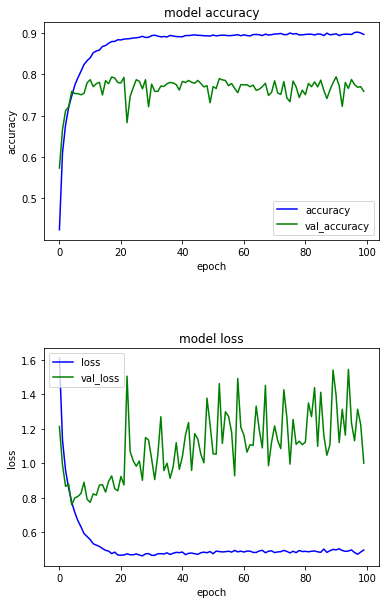

In [ ]:
plot_history(history1)

In [ ]:
# 学習結果を評価する
test_loss, test_acc = model1.evaluate(x_te, t_test, verbose=0)
print(f'test_loss: {test_loss:.4f}  test_acc: {test_acc:.4f}')

test_loss: 1.0076  test_acc: 0.7580


## 学習データを[0,1]に正規化した上で、Data Augmentationを使って学習データを増やす

<font color="red">[自分へのメモ]</font>
学習精度が非常に悪い。
ImageDataGenerator が何か変だ?

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size=64

datagen2 = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
    )

training_generator2 = datagen2.flow(
    x_tr,   ### [0, 1]
    t_train,
    batch_size=batch_size,
    subset='training'
    )

validation_generator2 = datagen2.flow(
    x_tr,   ### [0, 1]
    t_train,
    batch_size=batch_size,
    subset='validation'
    )

In [ ]:
# モデルを作成する
model2 = CNN(x_tr.shape[1:], 10)

model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.1),
    metrics=['accuracy']
    )

In [ ]:
# 学習する
history2=model2.fit(
    training_generator2,
    epochs=100,
    verbose=1,
    validation_data=validation_generator2
    )

Epoch 1/100
625/625 [==============================] - 20s 33ms/step - loss: 1.9990 - accuracy: 0.1330 - val_loss: 1.6475 - val_accuracy: 0.1152
Epoch 2/100
625/625 [==============================] - 18s 28ms/step - loss: 1.6012 - accuracy: 0.0959 - val_loss: 1.4858 - val_accuracy: 0.0894
Epoch 3/100
625/625 [==============================] - 18s 28ms/step - loss: 1.4416 - accuracy: 0.0967 - val_loss: 1.3989 - val_accuracy: 0.0643
Epoch 4/100
625/625 [==============================] - 18s 28ms/step - loss: 1.3246 - accuracy: 0.0986 - val_loss: 1.2333 - val_accuracy: 0.1068
Epoch 5/100
625/625 [==============================] - 18s 28ms/step - loss: 1.2351 - accuracy: 0.0979 - val_loss: 1.2466 - val_accuracy: 0.1517
Epoch 6/100
625/625 [==============================] - 18s 28ms/step - loss: 1.1660 - accuracy: 0.1005 - val_loss: 1.1271 - val_accuracy: 0.1079
Epoch 7/100
625/625 [==============================] - 18s 28ms/step - loss: 1.1127 - accuracy: 0.0993 - val_loss: 1.0003 - val_ac

625/625 [==============================] - 18s 28ms/step - loss: 0.5499 - accuracy: 0.1010 - val_loss: 0.6900 - val_accuracy: 0.1129
Epoch 58/100
625/625 [==============================] - 18s 28ms/step - loss: 0.5452 - accuracy: 0.1006 - val_loss: 0.6813 - val_accuracy: 0.1058
Epoch 59/100
625/625 [==============================] - 18s 28ms/step - loss: 0.5432 - accuracy: 0.1007 - val_loss: 0.6686 - val_accuracy: 0.1015
Epoch 60/100
625/625 [==============================] - 18s 28ms/step - loss: 0.5408 - accuracy: 0.1010 - val_loss: 0.6940 - val_accuracy: 0.0945
Epoch 61/100
625/625 [==============================] - 18s 28ms/step - loss: 0.5408 - accuracy: 0.1009 - val_loss: 0.6965 - val_accuracy: 0.1087
Epoch 62/100
625/625 [==============================] - 18s 28ms/step - loss: 0.5392 - accuracy: 0.1014 - val_loss: 0.6678 - val_accuracy: 0.0961
Epoch 63/100
625/625 [==============================] - 18s 28ms/step - loss: 0.5308 - accuracy: 0.1002 - val_loss: 0.7008 - val_accuracy

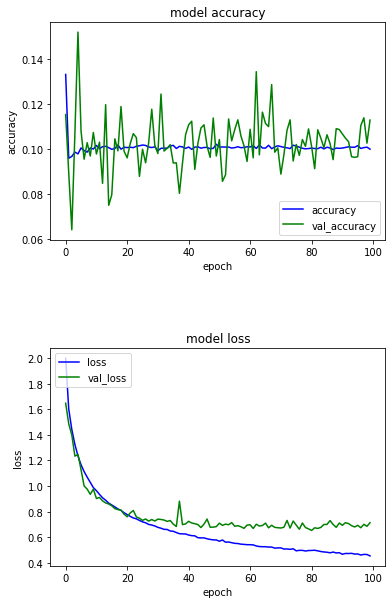

In [ ]:
plot_history(history2)

In [ ]:
# 学習結果を評価する
test_loss, test_acc = model2.evaluate(x_te, t_test, verbose=0)   ### x_te: [0,1]
print(f'test_loss: {test_loss:.4f}  test_acc: {test_acc:.4f}')

test_loss: 0.6865  test_acc: 0.1086


## Data Augmentationを使って[0,1]に正規化しながら学習データを増やす。

<font color="red">[自分へのメモ]</font>
学習精度が全く上がらず、非常に悪いままだ。
ImageDataGenerator が変だ?

次のように非常に単純なImageDataGenerator でも駄目で、学習できない。
ImageDataGeneratorの使い方が間違っているのか?

<code>
datagen3 = ImageDataGenerator(
    rescale=1.0/255.0, ### [0,1]に正規化
    validation_split=0.2
    )

training_generator3 = datagen3.flow(
    x_train,   ### [0,255]
    t_train,
    batch_size=batch_size,
    subset='training'
    )

validation_generator3 = datagen3.flow(
    x_train,   #### [0,255]
    t_train,
    batch_size=batch_size,
    subset='validation'
    )</code>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size=64

datagen3 = ImageDataGenerator(
    rescale=1.0/255.0, ### [0,1]に正規化
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
    )

datagen3.fit(x_train)

training_generator3 = datagen3.flow(
    x_train,   ### [0,255]
    t_train,
    batch_size=batch_size,
    subset='training'
    )

validation_generator3 = datagen3.flow(
    x_train,   #### [0,255]
    t_train,
    batch_size=batch_size,
    subset='validation'
    )

In [ ]:
# モデルを作成する
model3 = CNN(x_train.shape[1:], 10)

model3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.1),
    metrics=['accuracy']
    )

In [ ]:
# 学習する
history3=model3.fit(
    training_generator3,
    steps_per_epoch = len(x_train)*0.8 // batch_size,
    epochs=100,
    verbose=1,
    validation_data=validation_generator3,
    validation_steps=len(x_train)*0.2 // batch_size
    )

Epoch 1/100
625/625 [==============================] - 18s 30ms/step - loss: 1.9997 - accuracy: 0.1089 - val_loss: 1.6632 - val_accuracy: 0.1045
Epoch 2/100
625/625 [==============================] - 18s 29ms/step - loss: 1.5976 - accuracy: 0.0953 - val_loss: 1.5003 - val_accuracy: 0.0728
Epoch 3/100
625/625 [==============================] - 18s 29ms/step - loss: 1.4443 - accuracy: 0.0945 - val_loss: 1.3183 - val_accuracy: 0.0768
Epoch 4/100
625/625 [==============================] - 18s 29ms/step - loss: 1.3357 - accuracy: 0.0971 - val_loss: 1.2784 - val_accuracy: 0.1184
Epoch 5/100
625/625 [==============================] - 18s 29ms/step - loss: 1.2467 - accuracy: 0.0982 - val_loss: 1.1740 - val_accuracy: 0.0681
Epoch 6/100
625/625 [==============================] - 18s 29ms/step - loss: 1.1803 - accuracy: 0.0977 - val_loss: 1.0817 - val_accuracy: 0.1075
Epoch 7/100
625/625 [==============================] - 18s 29ms/step - loss: 1.1204 - accuracy: 0.0991 - val_loss: 1.0922 - val_ac

625/625 [==============================] - 18s 29ms/step - loss: 0.5410 - accuracy: 0.1006 - val_loss: 0.6964 - val_accuracy: 0.1086
Epoch 58/100
625/625 [==============================] - 18s 29ms/step - loss: 0.5389 - accuracy: 0.1006 - val_loss: 0.6976 - val_accuracy: 0.0984
Epoch 59/100
625/625 [==============================] - 18s 29ms/step - loss: 0.5373 - accuracy: 0.1009 - val_loss: 0.6783 - val_accuracy: 0.1022
Epoch 60/100
625/625 [==============================] - 18s 29ms/step - loss: 0.5399 - accuracy: 0.1011 - val_loss: 0.6863 - val_accuracy: 0.0974
Epoch 61/100
625/625 [==============================] - 18s 29ms/step - loss: 0.5309 - accuracy: 0.1005 - val_loss: 0.6933 - val_accuracy: 0.0946
Epoch 62/100
625/625 [==============================] - 18s 29ms/step - loss: 0.5320 - accuracy: 0.1004 - val_loss: 0.6756 - val_accuracy: 0.1092
Epoch 63/100
625/625 [==============================] - 18s 29ms/step - loss: 0.5290 - accuracy: 0.1011 - val_loss: 0.6996 - val_accuracy

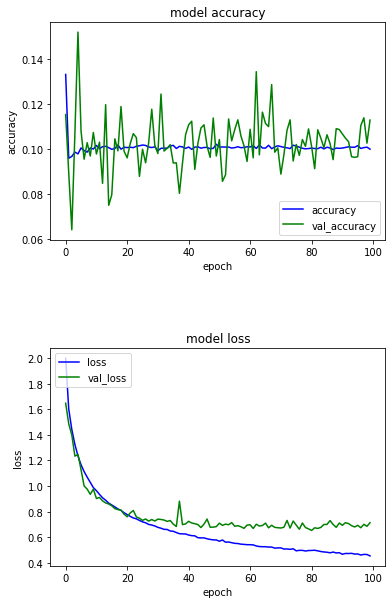

In [ ]:
plot_history(history2)

In [ ]:
# 学習結果を評価する
test_loss, test_acc = model3.evaluate(x_test, t_test, verbose=0)
print(f'test_loss: {test_loss:.4f}  test_acc: {test_acc:.4f}')

test_loss: 658.2307  test_acc: 0.5696


## ImageDataGenerator でDataAugumentationする時はloss='sparse_categorical_crossentropy' を使ってはいけない。

# [自分へのメモ] <font color="red">tensorflow.keras のバグ判明 (2021/03/03)</font>

model.fit() でデータgeneratorを使っていると、model.compile() でloss='sparse_categorical_crossentropy'を指定していると正しく学習できない。
loss = 'categorical_crossentropy'ならば正しく学習できるようだ。

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size=64
t_train_cat = tf.keras.utils.to_categorical(t_train,10)
t_test_cat = tf.keras.utils.to_categorical(t_test,10)

datagen5 = ImageDataGenerator(
    rescale=1.0/255.0, ### [0,1]に正規化
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
    )
datagen5.fit(x_train)
training_generator5 = datagen5.flow(
    x_train,   ### [0,255]
    t_train_cat,
    batch_size=batch_size,
    subset='training'
    )

validation_generator5 = datagen5.flow(
    x_train,   #### [0,255]
    t_train_cat,
    batch_size=batch_size,
    subset='validation'
    )
model5 = CNN(x_tr.shape[1:], 10)
model5.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy']
    )
history5=model5.fit(
    training_generator5,
    epochs=100,
    verbose=1,
    validation_data=validation_generator5
    )



Epoch 1/100
625/625 [==============================] - 20s 32ms/step - loss: 1.7173 - accuracy: 0.3803 - val_loss: 1.4592 - val_accuracy: 0.4712
Epoch 2/100
625/625 [==============================] - 18s 29ms/step - loss: 1.3541 - accuracy: 0.5264 - val_loss: 1.2711 - val_accuracy: 0.5554
Epoch 3/100
625/625 [==============================] - 20s 32ms/step - loss: 1.2109 - accuracy: 0.5849 - val_loss: 1.0543 - val_accuracy: 0.6461
Epoch 4/100
625/625 [==============================] - 20s 32ms/step - loss: 1.1283 - accuracy: 0.6167 - val_loss: 1.0397 - val_accuracy: 0.6522
Epoch 5/100
625/625 [==============================] - 18s 29ms/step - loss: 1.0828 - accuracy: 0.6366 - val_loss: 0.9919 - val_accuracy: 0.6649
Epoch 6/100
625/625 [==============================] - 18s 29ms/step - loss: 1.0452 - accuracy: 0.6550 - val_loss: 1.0264 - val_accuracy: 0.6553
Epoch 7/100
625/625 [==============================] - 18s 29ms/step - loss: 1.0143 - accuracy: 0.6685 - val_loss: 0.9574 - val_ac

Epoch 57/100
625/625 [==============================] - 18s 29ms/step - loss: 1.0350 - accuracy: 0.6843 - val_loss: 0.8996 - val_accuracy: 0.7215
Epoch 58/100
625/625 [==============================] - 18s 29ms/step - loss: 1.0206 - accuracy: 0.6866 - val_loss: 0.8836 - val_accuracy: 0.7285
Epoch 59/100
625/625 [==============================] - 18s 28ms/step - loss: 1.0389 - accuracy: 0.6824 - val_loss: 1.1125 - val_accuracy: 0.6591
Epoch 60/100
625/625 [==============================] - 18s 29ms/step - loss: 1.0266 - accuracy: 0.6877 - val_loss: 1.0462 - val_accuracy: 0.6761
Epoch 61/100
625/625 [==============================] - 18s 29ms/step - loss: 1.0376 - accuracy: 0.6828 - val_loss: 1.0151 - val_accuracy: 0.6934
Epoch 62/100
625/625 [==============================] - 18s 29ms/step - loss: 1.0432 - accuracy: 0.6831 - val_loss: 0.8791 - val_accuracy: 0.7357
Epoch 63/100
625/625 [==============================] - 18s 30ms/step - loss: 1.0407 - accuracy: 0.6822 - val_loss: 1.0172 -

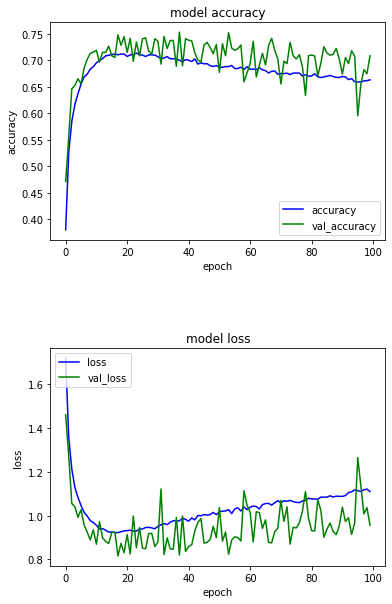

In [ ]:
plot_history(history5)

In [ ]:
# 学習結果を評価する
test_loss, test_acc = model5.evaluate(x_test, t_test_cat, verbose=0)
print(f'test_loss: {test_loss:.4f}  test_acc: {test_acc:.4f}')

test_loss: 747.9181  test_acc: 0.4552
